## Lecture des fichiers :

In [152]:
# Définir la fonction de remplacement
methodes = {
          "WordSwapNeighboringCharacterSwap":"NeighbCharSwap",
          "WordSwapQWERTY":"QWERTYCharSub",
          "WordSwapRandomCharacterSubstitution":"RandomCharSub",
          "naturality_by_removing_stop_words":"RemoveStopWords",
          'summarization_with_t5-base_from_description_to_title':'T5DescToTitle',
          'WordInnerSwapRandom':"RandomOrderSwap",
          'back_translation_pivot_language_de':"BackTranslation",
          'ramsrigouthamg/t5_paraphraser':"T5QQP",
          'WordSwapWordNet':"WordNetSynSwap",
          'WordSwapEmbedding':"WordEmbedSynSwap"}
def remplacer_mot(methodes,phrase):
  if phrase == "BM25":
    return "original_query"
  for mot_a_remplacer in methodes:
    if mot_a_remplacer in phrase:
        return  methodes[mot_a_remplacer]
  return phrase

In [2]:
remplacer_mot(methodes,"BM25+WordSwapQWERTY")


'QWERTYCharSub'

In [3]:
import pandas as pd
def lecture (fichier):
  # Lire le fichier CSV
  df = pd.read_csv(fichier)

  df['name'] = df['name'].apply(lambda x: remplacer_mot(methodes, x))
  df = df[["name","ndcg_cut_10"]]
  return df

lecture ('BM_25.csv')

,name,ndcg_cut_10
0,original_query,0.479540
1,NeighbCharSwap,0.274701
2,QWERTYCharSub,0.243548
3,RandomCharSub,0.231450
4,RemoveStopWords,0.477754
5,T5DescToTitle,0.421481
6,RandomOrderSwap,0.479540
7,BackTranslation,0.396437
8,T5QQP,0.472212
9,WordNetSynSwap,0.348766


In [4]:
trec = ["BM_25.csv","BM_25_RM3.csv","BM25_KNRM.csv","BM25_CKNRM.csv","BM25_EPIC.csv","BM25_BERT.csv","BM25_T5.csv"]
colonnes = ["BM25", "RM3", "KNRM", "CKNRM" ,"EPIC" ,"BERT", "T5"]

trec_scores = pd.DataFrame()

for idx, fichier in enumerate(trec):
    df = lecture (fichier)

    trec_scores[colonnes[idx]] = df['ndcg_cut_10']

trec_scores['name'] = lecture (trec[0])['name']

trec_scores = trec_scores[['name'] + colonnes]

trec_scores

,name,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
0,original_query,0.479540,0.515595,0.496959,0.493117,0.624047,0.628664,0.699780
1,NeighbCharSwap,0.274701,0.274816,0.317241,0.307987,0.389341,0.422847,0.494417
2,QWERTYCharSub,0.243548,0.250378,0.275153,0.296539,0.349635,0.388942,0.446060
3,RandomCharSub,0.231450,0.234741,0.222502,0.226251,0.294983,0.316191,0.396311
4,RemoveStopWords,0.477754,0.511339,0.489481,0.475599,0.621385,0.625341,0.686159
5,T5DescToTitle,0.421481,0.434432,0.394968,0.392752,0.506071,0.537398,0.571683
6,RandomOrderSwap,0.479540,0.515595,0.496959,0.470756,0.622721,0.612984,0.697020
7,BackTranslation,0.396437,0.419520,0.376331,0.360486,0.530082,0.559598,0.605816
8,T5QQP,0.472212,0.504274,0.437429,0.460877,0.604045,0.629245,0.704520
9,WordNetSynSwap,0.348766,0.365042,0.359142,0.360497,0.449044,0.497299,0.545733


## ANTIQUE:

In [18]:
antique = ["antique_BM_25.csv","antique_BM_25_RM3.csv","antique_BM25_KNRM.csv","antique_BM25_CKNRM.csv","antique_BM25_EPIC.csv","antique_BM25_BERT.csv","antique_BM25_T5.csv"]
colonnes = ["BM25", "RM3", "KNRM", "CKNRM" ,"EPIC" ,"BERT", "T5"]

antique_scores = pd.DataFrame()

for idx, fichier in enumerate(antique):
    df = lecture(fichier)

    antique_scores[colonnes[idx]] = df['ndcg_cut_10']

antique_scores['name'] = lecture (antique[0])['name']

antique_scores = antique_scores[['name'] + colonnes]

antique_scores

,name,BM25,RM3,KNRM,CKNRM,EPIC,BERT,T5
0,original_query,0.228598,0.217015,0.195348,0.206472,0.265964,0.298741,0.333343
1,NeighbCharSwap,0.155925,0.146874,0.149475,0.144357,0.184004,0.219756,0.250900
2,QWERTYCharSub,0.161297,0.152542,0.153281,0.155270,0.192009,0.228915,0.265228
3,RandomCharSub,0.162307,0.159323,0.150131,0.147622,0.187947,0.218040,0.245766
4,RemoveStopWords,0.226959,0.216080,0.225525,0.215285,0.269284,0.278089,0.319982
5,T5DescToTitle,0.167330,0.164611,0.172450,0.167238,0.200639,0.213728,0.239296
6,RandomOrderSwap,0.228587,0.216919,0.195337,0.197762,0.266102,0.296807,0.325507
7,BackTranslation,0.161758,0.154594,0.135938,0.143829,0.203180,0.232330,0.258100
8,T5QQP,0.220146,0.206255,0.188036,0.195704,0.261390,0.287625,0.321404
9,WordEmbedSynSwap,0.175915,0.171544,0.172996,0.168927,0.213856,0.246034,0.281352


In [112]:
categorie = {"original_query": "original_query",
    "NeighbCharSwap": "misspelling",
    "RandomCharSub": "misspelling",
    "QWERTYCharSub": "misspelling",
    "RemoveStopWords": "naturality",
    "T5DescToTitle": "naturality",
    "RandomOrderSwap": "ordering",
    "BackTranslation": "Paraphrasing",
    "T5QQP": "Paraphrasing",
    "WordEmbedSynSwap": "Paraphrasing",
    "WordNetSynSwap": "Paraphrasing",
    }

df['name'] = antique_scores['name'].apply(lambda x: remplacer_mot(categorie, x))
df



def lecture_per_q (fichier):
  # Lire le fichier CSV
  df = pd.read_csv(fichier)

  df['name'] = df['name'].apply(lambda x: remplacer_mot(methodes, x))
  df['name'] = df['name'].apply(lambda x: remplacer_mot(categorie, x))

  return df

df = lecture_per_q ('antique_BM_25_q.csv')

### Calcul de la différence de score :

<ipython-input-42-afae592d51cb>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel,legend = False)
<ipython-input-42-afae592d51cb>:39: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel,legend = False)
<ipython-input-42-afae592d51cb>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x
<ipython-input-42-afae592d51cb>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

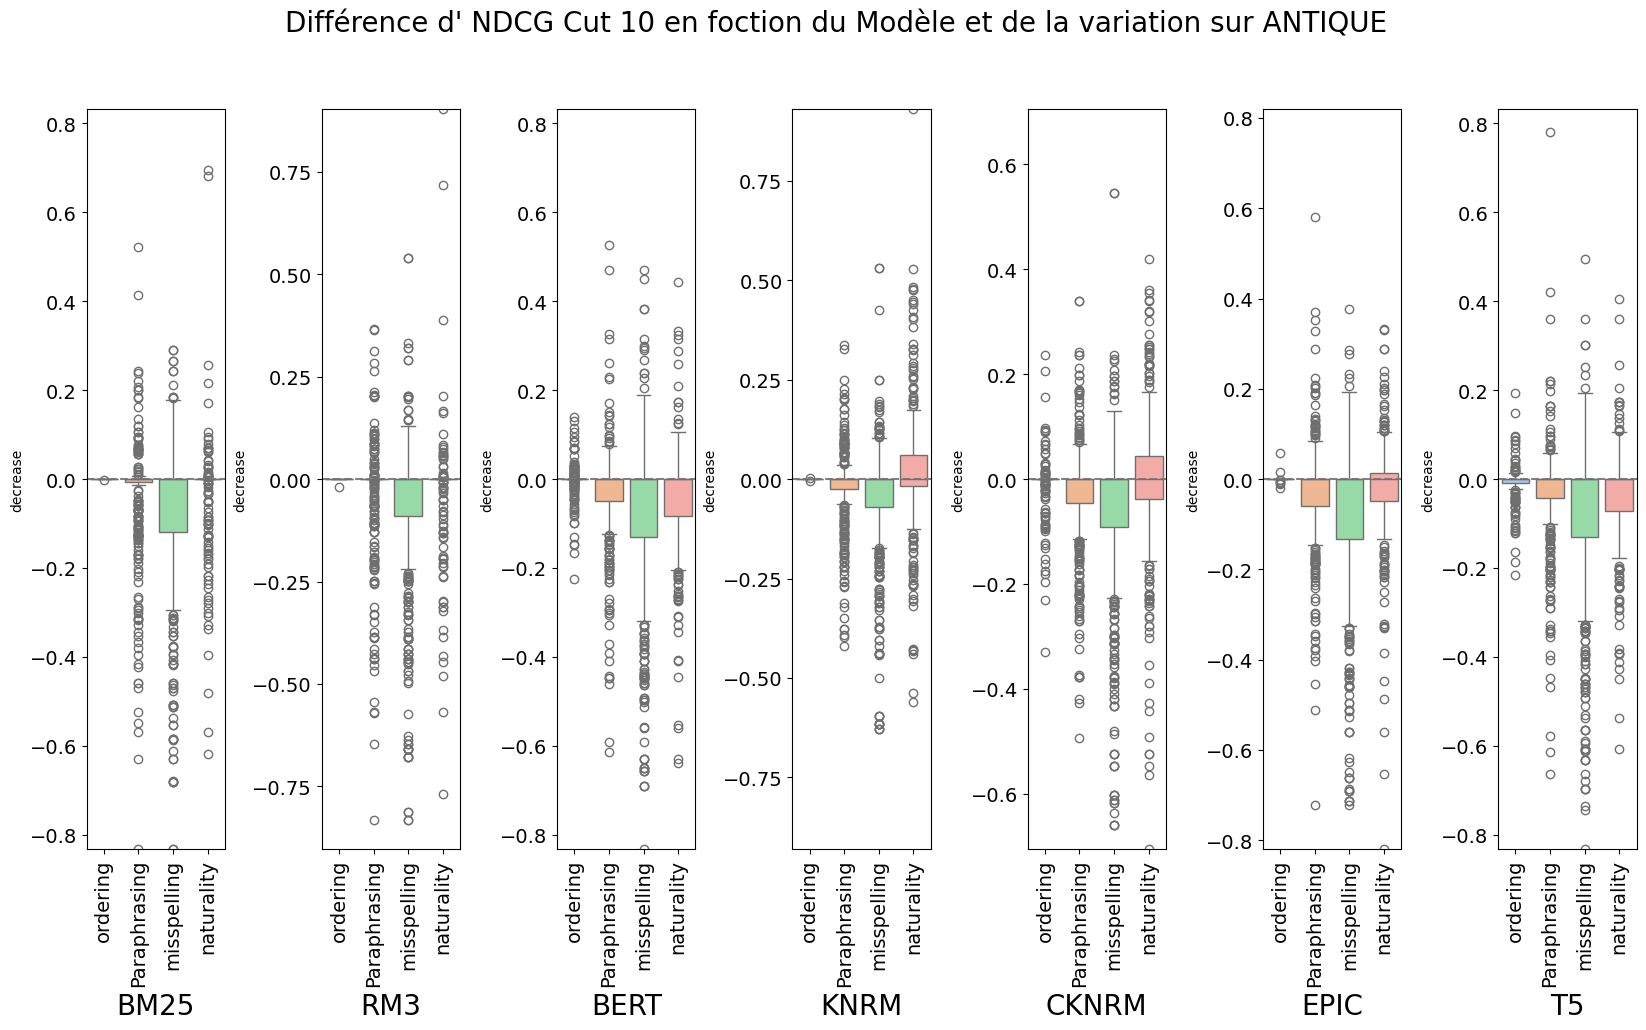

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour lire le fichier CSV
def lecture_per_q(file_path):
    return pd.read_csv(file_path)

# Définir les modèles et leurs noms
modeles = ['antique_BM_25_q.csv','antique_BM_25_RM3_q.csv', 'antique_BM25_BERT_q.csv', 'antique_BM25_KNRM_q.csv','antique_BM25_CKNRM_q.csv','antique_BM25_EPIC_q.csv', 'antique_BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+BERT', 'BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+T5']
nom_affichage = ['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10))

couleurs_pastel = sns.color_palette("pastel")

for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    variations = pd.read_csv("antique_annote.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])
    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    data_modele = comparaison_original_var

    sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel,legend = False)

    axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x

    axes[i].set_xlabel(nom_affichage[i], fontsize=20)  # Augmenter la taille de la police de l'axe x

    axes[i].title.set(y=1.05, fontsize=10)  # Augmenter la taille de la police du titre

    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=17)

    axes[i].axhline(0, color='gray', linestyle='--')

    max_abs_decrease = max(abs(data_modele['decrease'].min()), abs(data_modele['decrease'].max()))
    axes[i].set_ylim(-max_abs_decrease, max_abs_decrease)

plt.subplots_adjust(wspace=0.7)

plt.subplots_adjust(top=0.85)

plt.suptitle('Différence d\' NDCG Cut 10 en foction du Modèle et de la variation sur ANTIQUE', y=0.95, fontsize=20)  # Augmenter la taille de la police du titre global

plt.show()


### Table de correlation :

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les modèles et leurs noms
modeles = ['antique_BM_25_q.csv','antique_BM_25_RM3_q.csv',  'antique_BM25_KNRM_q.csv','antique_BM25_CKNRM_q.csv','antique_BM25_EPIC_q.csv','antique_BM25_BERT_q.csv', 'antique_BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+BERT', 'BM25+T5']
nom_affichage = ['BM25', 'RM3', 'KNRM','CKNRM', 'EPIC','BERT','T5']

df_ordering = pd.DataFrame()
df_paraphrasing = pd.DataFrame()
df_misspelling = pd.DataFrame()
df_naturality = pd.DataFrame()

dfs = [df_ordering,
        df_paraphrasing,
        df_misspelling,
        df_naturality ]
for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    variations = pd.read_csv("antique_annote.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])

    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    for j,method in enumerate (['ordering', 'Paraphrasing', 'misspelling', 'naturality']):

      filtered_df = comparaison_original_var[comparaison_original_var['name_x'] == method]
      dfs[j][nom_affichage[i]] = filtered_df['decrease']



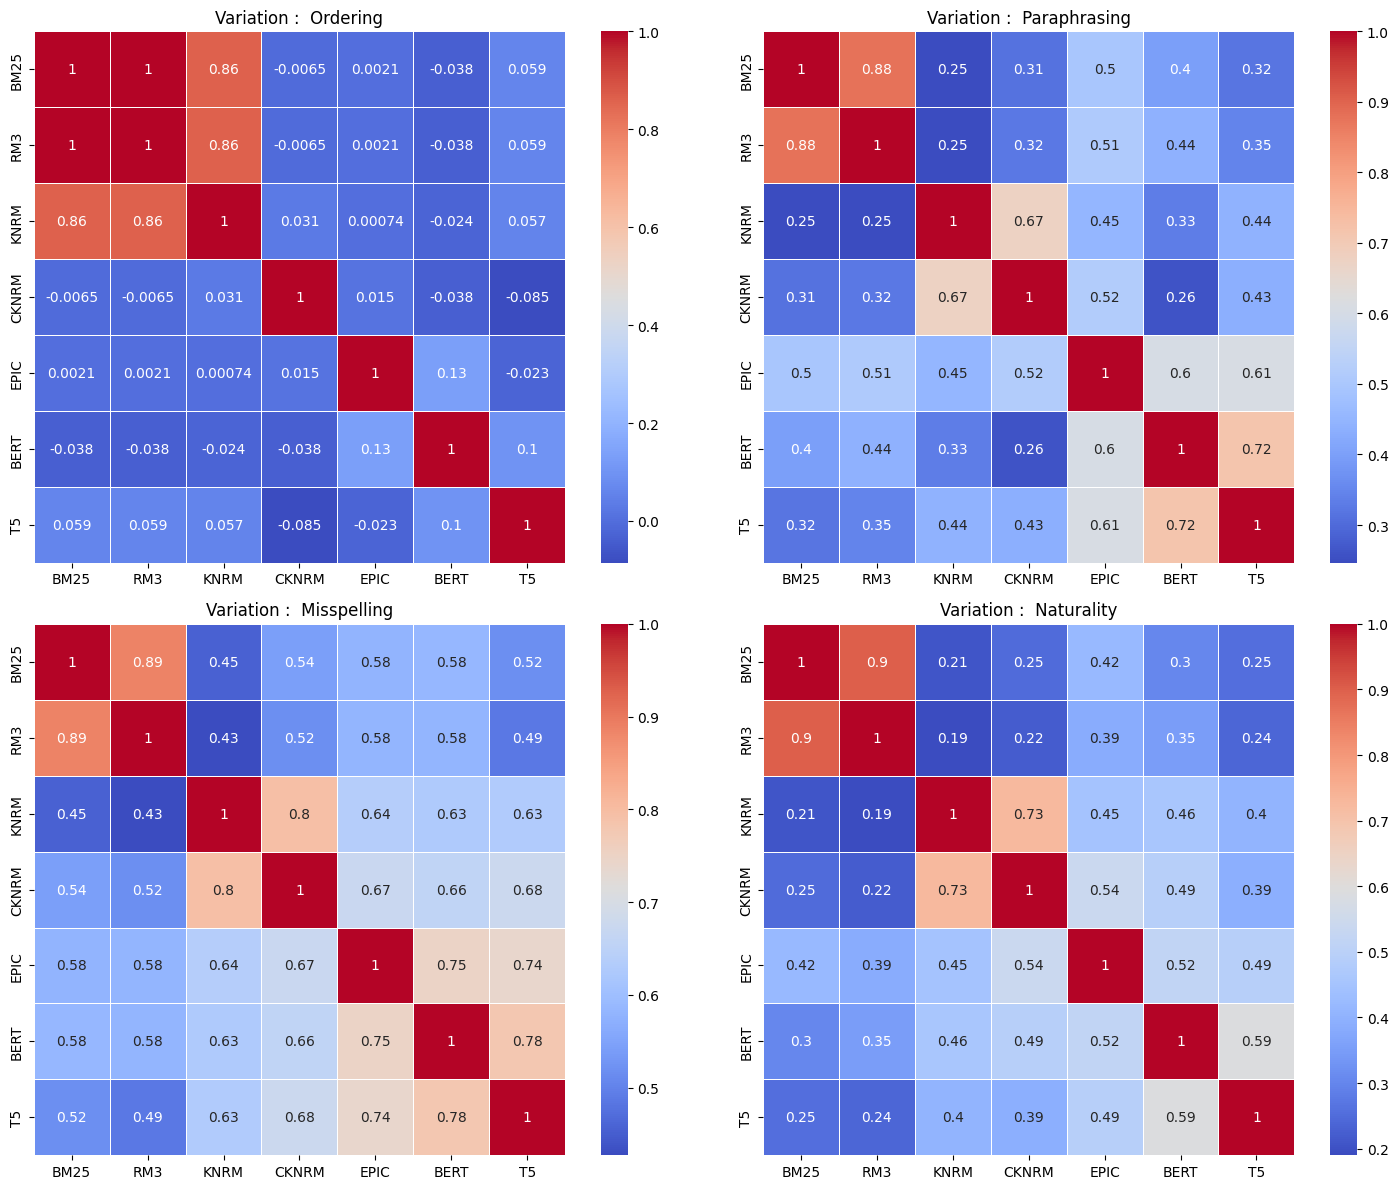

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(15, 12))
variations = ['Ordering', 'Paraphrasing', 'Misspelling', 'Naturality']

for i, df in enumerate(dfs):
    correlation_matrix = df.corr()
    ax = axs[i // 2, i % 2]
    sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='coolwarm', square=True, linewidths=.5)
    ax.set_title(f'Variation :  {variations[i]}')
plt.tight_layout()
plt.show()

### Nombre de variantes meilleures que les requetes originales :

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les modèles et leurs noms
modeles = ['antique_BM_25_q.csv','antique_BM_25_RM3_q.csv',  'antique_BM25_KNRM_q.csv','antique_BM25_CKNRM_q.csv','antique_BM25_EPIC_q.csv','antique_BM25_BERT_q.csv', 'antique_BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+BERT', 'BM25+T5']
nom_affichage = ['BM25', 'RM3', 'KNRM','CKNRM', 'EPIC','BERT','T5']

df_ordering = pd.DataFrame()
df_paraphrasing = pd.DataFrame()
df_misspelling = pd.DataFrame()
df_naturality = pd.DataFrame()

dfs = [df_ordering,
        df_paraphrasing,
        df_misspelling,
        df_naturality ]
for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    variations = pd.read_csv("antique_annote.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])

    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    for j,method in enumerate (['ordering', 'Paraphrasing', 'misspelling', 'naturality']):

      filtered_df = comparaison_original_var[    (comparaison_original_var['name_x'] == method) &
                                                    ( comparaison_original_var['decrease'] > 0)]

      dfs[j][nom_affichage[i]] = [len(filtered_df['qid'].unique())]


In [190]:
len(filtered_df['qid'].unique())

64

In [179]:
dfs[0]["BM25"].iloc[0]

0

In [201]:
dictionnaire = {}
for i,m in enumerate(['BM25', 'RM3', 'KNRM','CKNRM', 'EPIC','BERT','T5']):
  for df in dfs:
    if m not in dictionnaire :
      dictionnaire[m] = []
    dictionnaire[m].append(df[m].iloc[0])

In [202]:
dictionnaire

{'BM25': [0, 39, 48, 28],
 'RM3': [0, 38, 46, 24],
 'KNRM': [1, 61, 62, 92],
 'CKNRM': [28, 58, 47, 81],
 'EPIC': [2, 68, 62, 81],
 'BERT': [46, 60, 69, 55],
 'T5': [33, 54, 65, 64]}

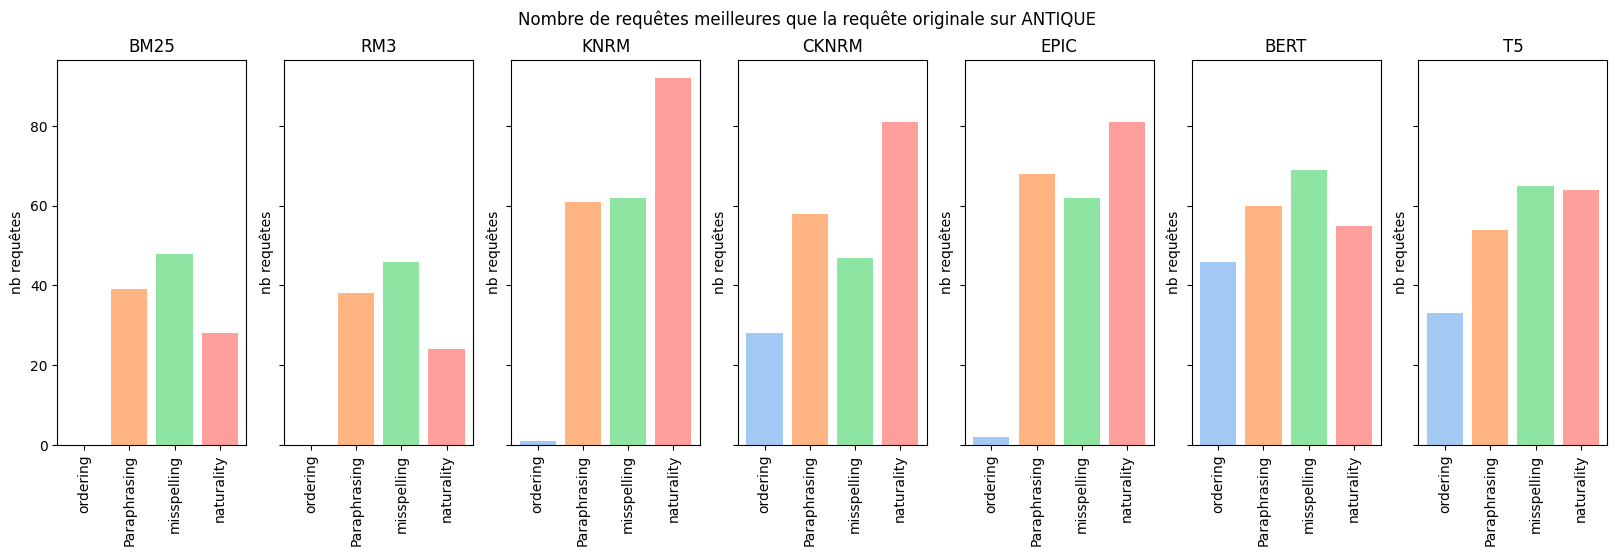

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

x = ['ordering', 'Paraphrasing', 'misspelling', 'naturality']
couleur = sns.color_palette("pastel")

fig, axs = plt.subplots(1, 7, figsize=(20, 5), sharey=True)

for i, (modele, valeurs) in enumerate(dictionnaire.items()):
    axs[i].bar(x, valeurs, color=couleur)
    axs[i].set_title(modele)
    axs[i].tick_params(axis='x', rotation=90)  # Rotation des étiquettes sur l'axe x

fig.suptitle('Nombre de requêtes meilleures que la requête originale sur ANTIQUE')
for ax in axs:
    ax.set_ylabel('nb requêtes')

plt.show()


## TREC:

### Calcul de la différence de score :

<ipython-input-38-9aa4b2787646>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel, showfliers=True)
<ipython-input-38-9aa4b2787646>:34: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel, showfliers=True)
<ipython-input-38-9aa4b2787646>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x
<ipython-input-38-9aa4b2787646>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

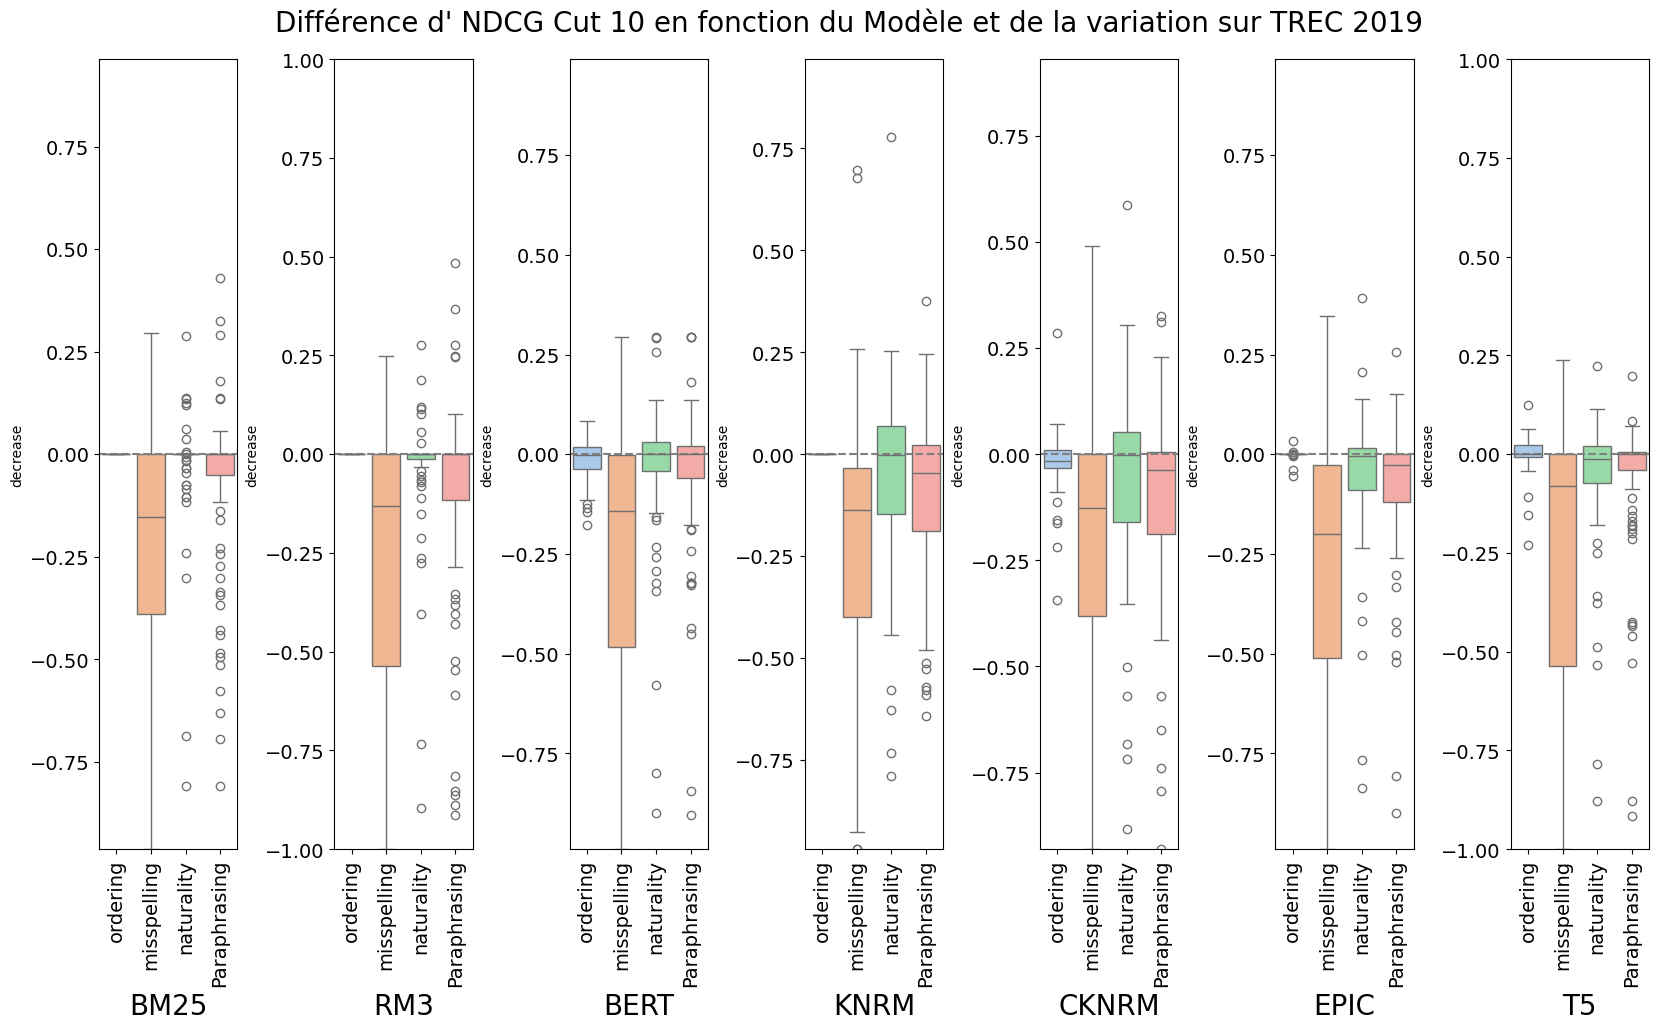

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def lecture_per_q(file_path):
    return pd.read_csv(file_path)

modeles = ['BM_25_q.csv','BM_25_RM3_q.csv', 'BM25_BERT_q.csv', 'BM25_KNRM_q.csv','BM25_CKNRM_q.csv','BM25_EPIC_q.csv', 'BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+BERT', 'BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+T5']
nom_affichage = ['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10))

couleurs_pastel = sns.color_palette("pastel")

for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)
    variations = pd.read_csv("trec2019_annote.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])
    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    data_modele = comparaison_original_var

    sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel, showfliers=True)

    axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x

    axes[i].set_xlabel(nom_affichage[i], fontsize=20)  # Augmenter la taille de la police de l'axe x

    axes[i].title.set(y=1.05, fontsize=10)  # Augmenter la taille de la police du titre

    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=17)

    # Ajouter une ligne horizontale à zéro
    axes[i].axhline(0, color='gray', linestyle='--')

    # Assurer que l'axe y est symétrique autour de zéro
    max_abs_decrease = max(abs(data_modele['decrease'].min()), abs(data_modele['decrease'].max()))
    axes[i].set_ylim(-max_abs_decrease, max_abs_decrease)

plt.subplots_adjust(wspace=0.7)
plt.subplots_adjust(top=0.9)

plt.suptitle('Différence d\' NDCG Cut 10 en fonction du Modèle et de la variation sur TREC 2019', y=0.95, fontsize=20)  # Augmenter la taille de la police du titre global

# Afficher le plot
plt.show()


### Nombre de variantes meilleures que les requetes originales :

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les modèles et leurs noms
modeles = ['BM_25_q.csv','BM_25_RM3_q.csv', 'BM25_BERT_q.csv', 'BM25_KNRM_q.csv','BM25_CKNRM_q.csv','BM25_EPIC_q.csv', 'BM25_T5_q.csv']
nom_modeles = ['BM25', 'BM25','BM25+BERT', 'BM25+KNRM','BM25+CKNRM', 'BM25+EPIC','BM25+T5']
nom_affichage = ['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']

df_ordering = pd.DataFrame()
df_paraphrasing = pd.DataFrame()
df_misspelling = pd.DataFrame()
df_naturality = pd.DataFrame()

dfs = [df_ordering,
        df_paraphrasing,
        df_misspelling,
        df_naturality ]
for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)

    variations = pd.read_csv("trec2019_annote.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])

    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    for j,method in enumerate (['ordering', 'Paraphrasing', 'misspelling', 'naturality']):

      filtered_df = comparaison_original_var[    (comparaison_original_var['name_x'] == method) &
                                                    ( comparaison_original_var['decrease'] > 0)]

      dfs[j][nom_affichage[i]] = [len(filtered_df['qid'].unique())]


In [205]:
len(filtered_df['qid'].unique())

18

In [206]:
dfs[0]["BM25"].iloc[0]

0

In [210]:
dictionnaire = {}
for i,m in enumerate(['BM25', 'RM3','BERT', 'KNRM','CKNRM', 'EPIC','T5']):
  for df in dfs:
    if m not in dictionnaire :
      dictionnaire[m] = []
    dictionnaire[m].append(df[m].iloc[0])

In [211]:
dictionnaire

{'BM25': [0, 8, 14, 9],
 'RM3': [0, 9, 14, 7],
 'BERT': [17, 28, 17, 22],
 'KNRM': [0, 22, 14, 23],
 'CKNRM': [13, 21, 18, 24],
 'EPIC': [4, 16, 14, 18],
 'T5': [18, 21, 16, 18]}

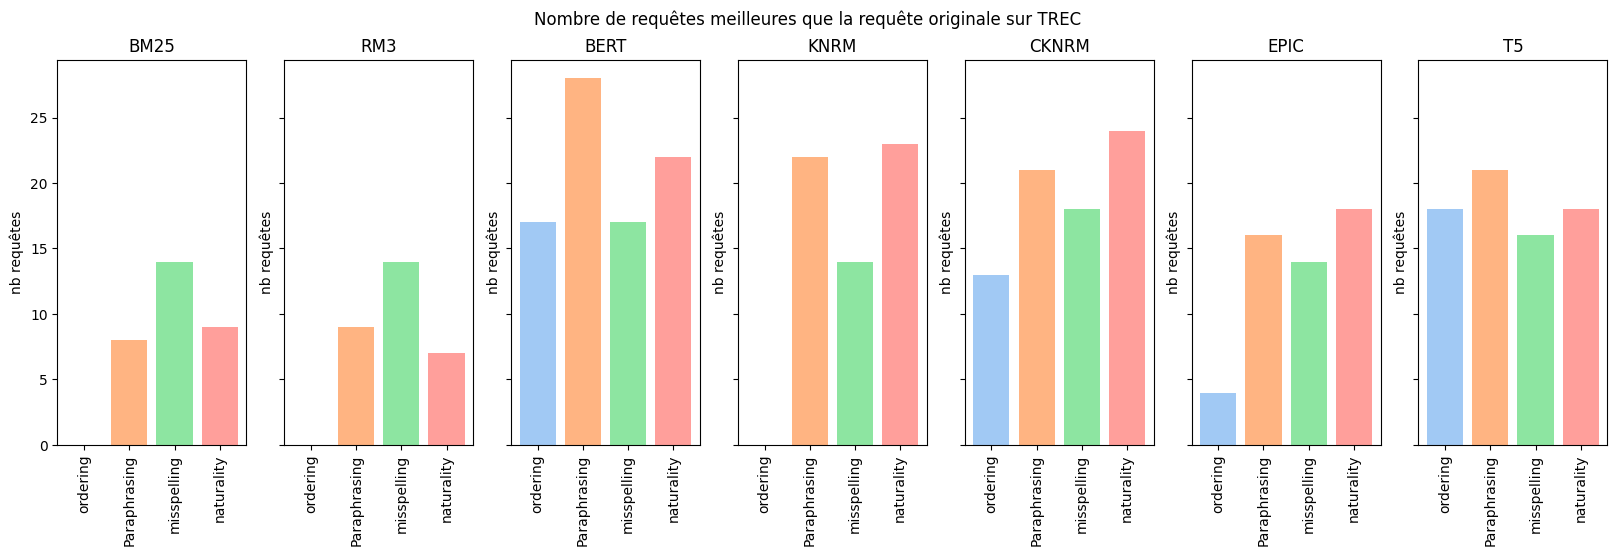

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

x = ['ordering', 'Paraphrasing', 'misspelling', 'naturality']
couleur = sns.color_palette("pastel")

fig, axs = plt.subplots(1, 7, figsize=(20, 5), sharey=True)

for i, (modele, valeurs) in enumerate(dictionnaire.items()):
    axs[i].bar(x, valeurs, color=couleur)
    axs[i].set_title(modele)
    axs[i].tick_params(axis='x', rotation=90)  # Rotation des étiquettes sur l'axe x

fig.suptitle('Nombre de requêtes meilleures que la requête originale sur TREC')
for ax in axs:
    ax.set_ylabel('nb requêtes')

plt.show()


## BERT avec 10 ou 100 docs :

<ipython-input-48-30186d58ac16>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel, showfliers=True)
<ipython-input-48-30186d58ac16>:34: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel, showfliers=True)
<ipython-input-48-30186d58ac16>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x
<ipython-input-48-30186d58ac16>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

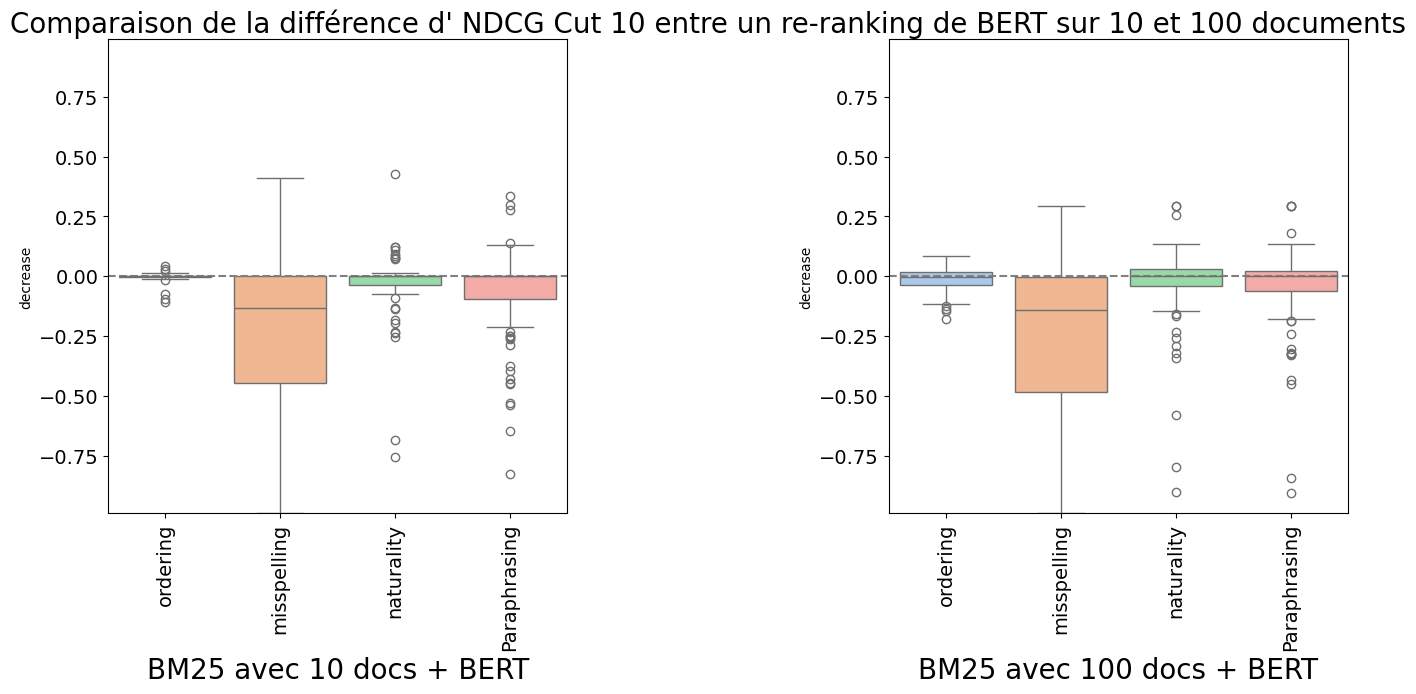

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def lecture_per_q(file_path):
    return pd.read_csv(file_path)

modeles = ['BM25_BERT_10_q.csv','BM25_BERT_q.csv']
nom_modeles = ['BM25+BERT','BM25+BERT']
nom_affichage = ['BM25 avec 10 docs + BERT', 'BM25 avec 100 docs + BERT']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

couleurs_pastel = sns.color_palette("pastel")

for i, modele in enumerate(modeles):

    df3 = pd.read_csv(modele)
    df3['qid'] = df3['qid'].astype(str)
    variations = pd.read_csv("trec2019_annote.csv")
    variations['name'] = variations.apply(lambda r, n=nom_modeles[i]: n+"+"+r['method'], axis=1)
    variations['qid'] = variations['q_id'].astype(str)

    filtred = df3.merge(variations[variations['valid']][['qid', 'name', 'valid']], on=['qid', 'name'])
    comparaison_original_var = filtred.merge(df3[df3['name']==nom_modeles[i]], on=['qid', 'measure'])
    comparaison_original_var["decrease"] = comparaison_original_var['value_x'] - comparaison_original_var['value_y']
    comparaison_original_var["decrease_percentage"] = comparaison_original_var['decrease']/comparaison_original_var['value_y']

    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(methodes, x))
    comparaison_original_var['name_x'] = comparaison_original_var['name_x'].apply(lambda x: remplacer_mot(categorie, x))

    data_modele = comparaison_original_var

    sns.boxplot(x='name_x', y='decrease', data=data_modele, ax=axes[i], palette=couleurs_pastel, showfliers=True)

    axes[i].set_xticklabels(data_modele['name_x'].unique(), rotation=90, ha='center', fontsize=10)  # Augmenter la taille de la police des étiquettes x

    axes[i].set_xlabel(nom_affichage[i], fontsize=20)  # Augmenter la taille de la police de l'axe x

    axes[i].title.set(y=1.05, fontsize=10)  # Augmenter la taille de la police du titre

    axes[i].tick_params(axis='both', which='major', labelsize=14)
    axes[i].tick_params(axis='both', which='minor', labelsize=17)

    # Ajouter une ligne horizontale à zéro
    axes[i].axhline(0, color='gray', linestyle='--')

    # Assurer que l'axe y est symétrique autour de zéro
    max_abs_decrease = max(abs(data_modele['decrease'].min()), abs(data_modele['decrease'].max()))
    axes[i].set_ylim(-max_abs_decrease, max_abs_decrease)

plt.subplots_adjust(wspace=0.7)
plt.subplots_adjust(top=0.9)

plt.suptitle('Comparaison de la différence d\' NDCG Cut 10 entre un re-ranking de BERT sur 10 et 100 documents', y=0.95, fontsize=20)  # Augmenter la taille de la police du titre global

# Afficher le plot
plt.show()

